In [5]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('unprocessed_dataset.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

In [3]:
df = pd.read_csv('unprocessed_dataset.csv')
column_names = df.columns
empty_entry = '    '

C:\Users\berpr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,15,16,18,32,34,36,37,41,45,46,55,71,83,84,86,87,90,91,92,96,98,100,101,103,104,105,106,107,108,109) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,CASEID,YYYYMM,YYYYQ,YYYY,ID,IDPREV,DATEPR,ICS,ICC,ICE,...,GAS1PX1,GAS1PX2,GAS1,PINC,PINC2,PJOB,PSSA,PCRY,PSTK,WT
0,1,197801,19781,1978,1,,,76.71,116.23,51.32,...,,,,,,,,,,0.00
1,2,197801,19781,1978,2,,,121.12,154.08,99.94,...,,,,,,,,,,0.72
2,3,197801,19781,1978,3,,,2.70,2.70,2.70,...,,,,,,,,,,1.03
3,4,197801,19781,1978,4,,,76.71,154.08,27.01,...,,,,,,,,,,0.00
4,5,197801,19781,1978,5,,,121.12,116.23,124.25,...,,,,,,,,,,0.93


In [19]:
def select_df_with_labels(df, labels):
    # remove missing entries
    sub_df = df[labels].replace(" ", "")
    for label in labels:
        sub_df = sub_df[sub_df[label] != '']
    return sub_df.astype(int)

[Text(0.5, 1.0, 'Correlation Matrix')]

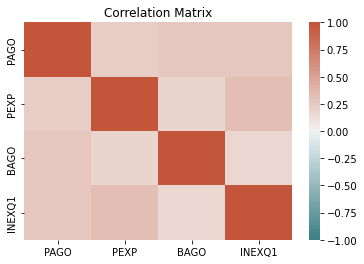

In [13]:
income_labels = ["PAGO", "PEXP", "BAGO", "INEXQ1"]
income = df[income_labels].replace(" ", "")
for label in income_labels:
    income = income[income[label] != '']
income = income.astype(int)
corrM = income.corr()
hmap = sns.heatmap(corrM, vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(200, 20, n=100))
hmap.set(title="Correlation Matrix")

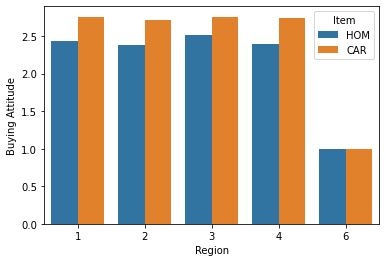

In [78]:
# car buying attitudes by region
buying_labels = ["HOM", "CAR", "REGION"]
buying_df = select_df_with_labels(df, home_buying_labels).groupby("REGION").mean().reset_index()
buying_df = pd.melt(buying_df, id_vars=["REGION"], value_vars=["HOM", "CAR"])
buying_df = buying_df.rename(columns={"REGION": "Region", "value": "Buying Attitude", "variable": "Item"})
#print(buying_df.columns)
buying_plot = sns.barplot(x=buying_df.columns[0], y=buying_df.columns[2], hue=buying_df.columns[1], data=buying_df)

[Text(0.5, 1.0, 'Correlation Matrix')]

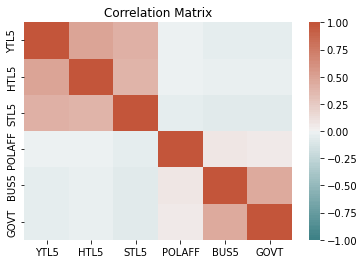

In [93]:
# [income quintile, home quintile, stock investment quintile, political affiliation,  economy in 5 years, gov economic policy]
economy_dem = ["YTL5", "HTL5", "STL5", "POLAFF", "BUS5", "GOVT"]
economy_df = select_df_with_labels(df, economy_dem)
economy_df = economy_df[(economy_df["POLAFF"] < 8) & (economy_df["BUS5"] < 98) & (economy_df["GOVT"] < 8)]
economy_df.head()
economy_corr = economy_df.corr()
hmap = sns.heatmap(economy_corr, vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(200, 20, n=100))
hmap.set(title="Correlation Matrix")